# *Sanad Hamed Nasser AL Salmi*
Gmail: alsalmisanad@gmail.com

Dear Rihal’s Team,

I hope this email finds you well. My name is Sanad Hamed Alsalmi, and I am a Computer Science student focusing on Intelligent Systems and Data Science. I am very interested in AI and Machine Learning and would love the opportunity to contribute and learn as an intern at Rihal.

I possess a strong foundation in various technical skills, including Python programming, data analysis, and machine learning. I have hands-on experience with tools such as Scikit-learn and Matplotlib for building and evaluating machine learning models and visualizing data. Additionally, I am skilled in database management using MySQL. With these skills, I am confident that I can contribute to your team while further developing my technical expertise.

Beyond my technical skills, I also bring strong non-technical abilities, including excellent communication and teamwork. I thrive in collaborative environments where I can contribute ideas while learning from others. My adaptability and problem-solving skills allow me to manage multiple tasks effectively, and my attention to detail helps me approach challenges critically. I am also self-motivated, capable of working independently, and always eager to contribute to team success.

Given my strong background in Python, Machine Learning, and Data Analysis, I am drawn to your company’s innovative approach. I believe my skills would be valuable in supporting your team.

I would greatly appreciate the opportunity to discuss any available internship positions and how I can contribute to your team. Please let me know if we can arrange a meeting at your convenience. I have attached my resume for your review.

Looking forward to your response.

Best regards,
Sanad Hamed Alsalmi

# Sentiment Analysis Challenge


## Introduction

Ever wondered how social media platforms figure out if a post is positive or negative? Or how companies analyze customer reviews to improve their products? That’s where Sentiment Analysis comes in!

In this challenge, you'll step into the world of Natural Language Processing (NLP)—the tech behind chatbots, search engines, and AI assistants. Your task? Build a sentiment classification model that can determine whether a given piece of text is positive or negative.

<img src="sentiment_analysis.png" alt="Sentiment Analysis Example" width="600"/>

### Challenge Structure:
**Note: This notebook is a suggested starter template for the challenge. You are free to modify the code as you see fit.**

The challenge is divided into 4 sections:
- Task 1: Exploratory Data Analysis (EDA)
- Task 2: Data Preprocessing
- Task 3: Model Selection and Training
- Task 4: Evaluation
- Task 5: Inference (Optional)

The **dataset provided** (amazon.csv) contains **19,396 reviews** and two columns: text and label. The label is 0 for negative and 1 for positive.

<img src="dataset_str.png" alt="Dataset Example" width="400"/>

Note: The classification model you choose can range from traditional machine learning algorithms (e.g. Logistic Regression, Random Forest) to deep learning models like RNN, LSTM, and Transformers.

## Environment Setup

In [1]:
## Create virtual environment

# For Python (Windows/Linux/Mac):
# python -m venv myenv
# source myenv/bin/activate  # Linux/Mac
# myenv\Scripts\activate     # Windows

# If you're using Conda (Windows/Linux):
# conda create -n myenv 
# conda activate myenv

In [2]:
##Place all imports here 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

## Load and display the dataset
Use the cell below to load and display the dataset.

In [3]:
df = pd.read_csv("amazon.csv") # reads the file amazon.csv into a pandas dataframe

## Task 1: Exploratory data analysis (EDA)
 EDA helps uncover patterns, detect anomalies, and validate assumptions through data visualization and summary statistics. What insights can you extract from the dataset to better understand its structure and sentiment distribution?

In [4]:
# to display the first 5 rows
df.head()

,Text,label
0,"Not only do we enjoy this individually, it ent...",1
1,Over the years I have purchased these radio ap...,1
2,I love this game! There are very few ads. The ...,1
3,It won't let me move anyone and when I try to ...,0
4,Two things in order for me to want this. Get ...,0


In [5]:
# to view the statistics of the dataframe
df.describe()

,label
count,19396.000000
mean,0.769746
std,0.421006
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


<span style="color:red">##### TODO: perform more EDA and some visualizations</span>

In [6]:
# Here are a few options to explore for EDA and visualizations (you can choose some of them or add more):
# 1. Check for missing values in the dataset
# 2. Analyze the distribution of sentiment labels (check dataset balance)
# 3. Visualize the length of reviews (character/word count) by sentiment
# 4. Create word clouds for positive and negative reviews
# 5. Examine the most frequent words in each sentiment class
# 6. Analyze the relationship between review length and sentiment
# 7. Check for duplicate reviews
# 8. Visualize the distribution of review lengths

In [7]:
# Check for missing values
df.isnull().sum()

Text     0
label    0
dtype: int64

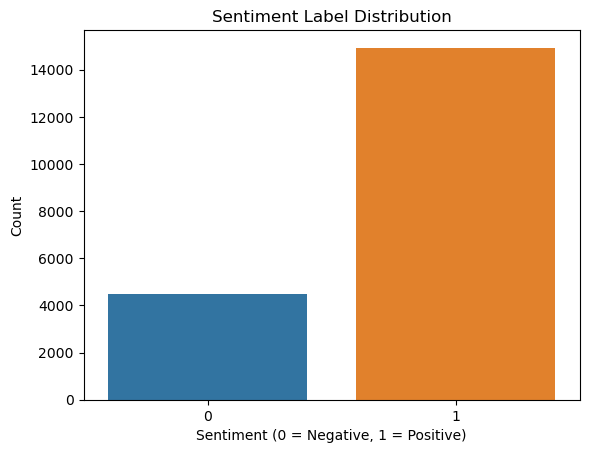

Positive reviews: 76.97%
Negative reviews: 23.03%


In [8]:
# Count the number of positive and negative reviews
sns.countplot(x=df['label'])
plt.title("Sentiment Label Distribution")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

# Check percentage
positive_ratio = df['label'].value_counts(normalize=True) * 100
print(f"Positive reviews: {positive_ratio[1]:.2f}%")
print(f"Negative reviews: {positive_ratio[0]:.2f}%")


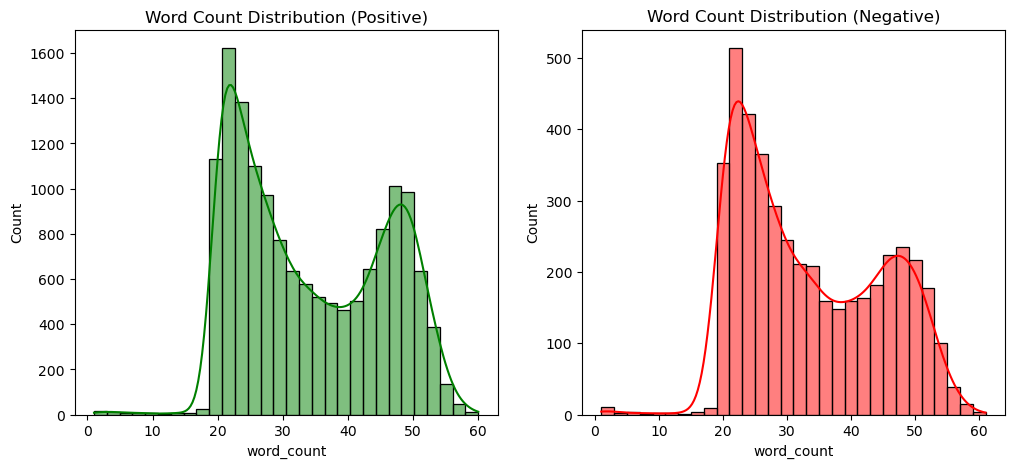

In [9]:
# Add new columns for word and character count
df["char_count"] = df["Text"].apply(len)
df["word_count"] = df["Text"].apply(lambda x: len(x.split()))



# Plot distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df[df["label"] == 1]["word_count"], bins=30, ax=ax[0], kde=True, color="green")
ax[0].set_title("Word Count Distribution (Positive)")

sns.histplot(df[df["label"] == 0]["word_count"], bins=30, ax=ax[1], kde=True, color="red")
ax[1].set_title("Word Count Distribution (Negative)")

plt.show()

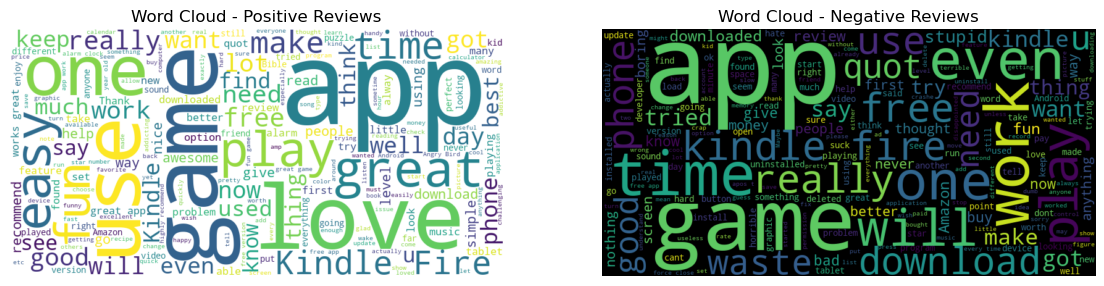

In [10]:
# Join all positive and negative reviews
positive_text = " ".join(df[df['label'] == 1]['Text'])
negative_text = " ".join(df[df['label'] == 0]['Text'])

# Generate word clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Display word clouds
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].imshow(wordcloud_pos, interpolation='bilinear')
ax[0].set_title("Word Cloud - Positive Reviews")
ax[0].axis("off")

ax[1].imshow(wordcloud_neg, interpolation='bilinear')
ax[1].set_title("Word Cloud - Negative Reviews")
ax[1].axis("off")

plt.show()

In [11]:
#Most Frequent Words in Each Sentiment Class
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

# Get words for each sentiment
positive_words = []
negative_words = []

for text in df[df["label"] == 1]["Text"]:
    positive_words.extend(clean_text(text))

for text in df[df["label"] == 0]["Text"]:
    negative_words.extend(clean_text(text))

# Get most common words
common_positive = Counter(positive_words).most_common(20)
common_negative = Counter(negative_words).most_common(20)

print("Most Common Positive Words:", common_positive)
print("Most Common Negative Words:", common_negative)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Most Common Positive Words: [('app', 8021), ('game', 4471), ('great', 3831), ('love', 3802), ('like', 3045), ('use', 2860), ('fun', 2347), ('kindle', 2154), ('get', 2128), ('one', 2125), ('easy', 1989), ('time', 1762), ('really', 1731), ('free', 1711), ('play', 1585), ('good', 1580), ('works', 1524), ('fire', 1476), ('would', 1287), ('well', 1253)]
Most Common Negative Words: [('app', 2542), ('game', 1333), ('get', 1004), ('like', 769), ('would', 721), ('kindle', 697), ('time', 675), ('even', 636), ('work', 570), ('free', 510), ('one', 493), ('fire', 467), ('play', 424), ('really', 420), ('waste', 386), ('download', 356), ('phone', 350), ('use', 349), ('good', 336), ('quot', 335)]


Average Character Count:
label
0    172.170846
1    176.854789
Name: char_count, dtype: float64

Average Word Count:
label
0    33.238916
1    34.147488
Name: word_count, dtype: float64


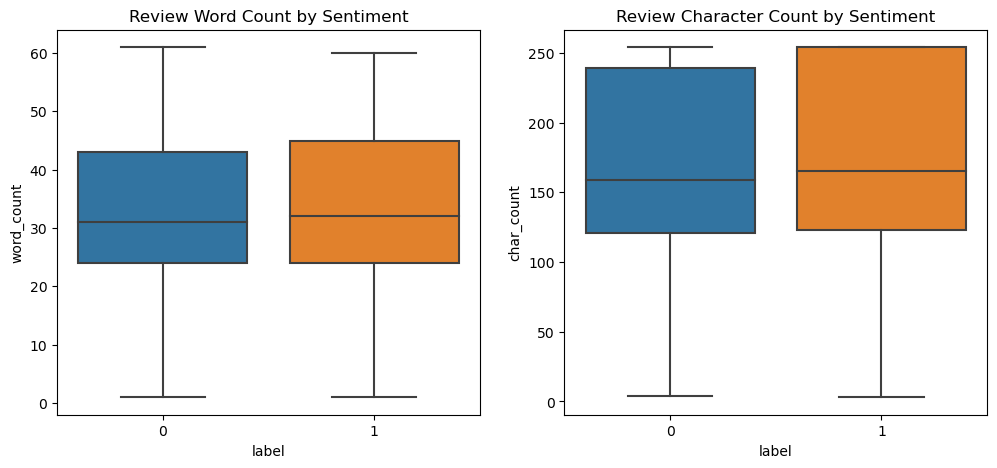

In [12]:
# Compute average review length per sentiment
avg_char_length = df.groupby("label")["char_count"].mean()
avg_word_length = df.groupby("label")["word_count"].mean()

print("Average Character Count:")
print(avg_char_length)

print("\nAverage Word Count:")
print(avg_word_length)

# Visualizing the results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df["label"], y=df["word_count"], ax=ax[0])
ax[0].set_title("Review Word Count by Sentiment")

sns.boxplot(x=df["label"], y=df["char_count"], ax=ax[1])
ax[1].set_title("Review Character Count by Sentiment")

plt.show()


In [13]:
# Check for duplicate entries
duplicate_reviews = df.duplicated(subset=["Text"]).sum()
print(f"Number of duplicate reviews: {duplicate_reviews}")

# Remove duplicates if necessary
df = df.drop_duplicates(subset=["Text"], keep="first")

Number of duplicate reviews: 0


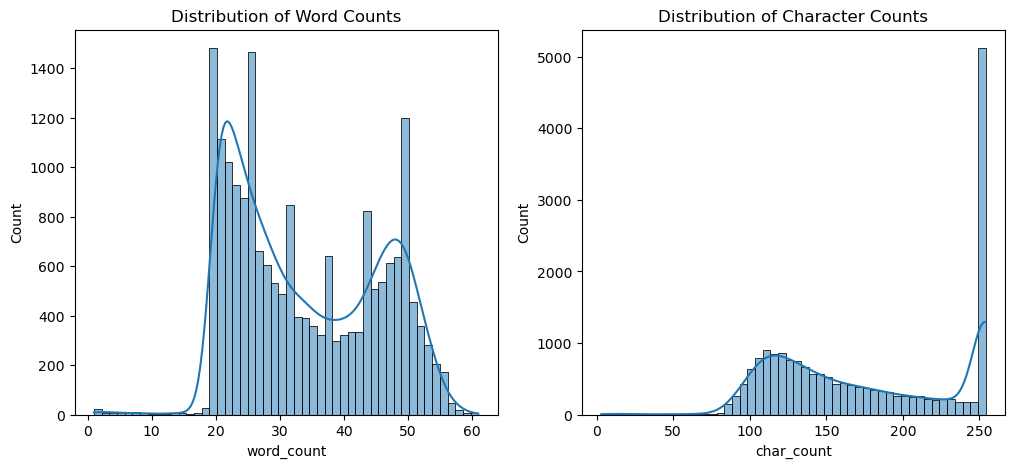

In [14]:
#Visualizing Review Length Distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["word_count"], bins=50, kde=True, ax=ax[0])
ax[0].set_title("Distribution of Word Counts")

sns.histplot(df["char_count"], bins=50, kde=True, ax=ax[1])
ax[1].set_title("Distribution of Character Counts")

plt.show()

# Task 2: Preprocessing
Raw text data is often noisy and unstructured, containing inconsistencies like typos, slang, abbreviations, and irrelevant information. How can you preprocess the dataset to clean and standardize the text for better sentiment classification?

Suggested pre-processing would be:
- Removing punctuation
- Removing stopwords
- Tokenizing text
- Text Lemmatization
- Text representation (hint:TF-IDF, bag of words, word2vec, BERT, etc)
- Converting sentiments to numerical labels(encoding)
- Splitting the dataset




#### **Note: The preprocessing steps are related to the model you choose to use.**

### Preprocess the dataset
Perform some preprocessings on the dataset as suggested above.

In [15]:
### TODO: perform preprocessings on the dataset

In [16]:
#Removing punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df["Text"] = df["Text"].apply(remove_punctuation)
df["Text"]

0        Not only do we enjoy this individually it ente...
1        Over the years I have purchased these radio ap...
2        I love this game There are very few ads The up...
3        It wont let me move anyone and when I try to g...
4        Two things in order for me to want this  Get h...
                               ...                        
19391    I think this is the best alarm clock app there...
19392    I hate alarm clocks Freak me out actually I ca...
19393    this game is confusing and just plain weird do...
19394    trying to go back and get best scores on all o...
19395    The minute I started the first level I had alr...
Name: Text, Length: 19396, dtype: object

In [17]:
#Removing Stopwords
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word.lower() not in stop_words])

df["Text"] = df["Text"].apply(remove_stopwords)
df["Text"]

0        enjoy individually entertains companions well ...
1                years purchased radio apps one best sorry
2        love game ads update amazing love new levels G...
3        wont let move anyone try go towards ball playe...
4        Two things order want Get higher resolution sc...
                               ...                        
19391    think best alarm clock app Alarm Clock Xtreme ...
19392    hate alarm clocks Freak actually set classical...
19393    game confusing plain weird dont get save time ...
19394    trying go back get best scores boards anywhere...
19395    minute started first level already gotten bore...
Name: Text, Length: 19396, dtype: object

In [18]:
#Tokenizing Text
nltk.download("punkt")

def tokenize_text(text):
    return word_tokenize(text)

df["tokens"] = df["Text"].apply(tokenize_text)
df["tokens"]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        [enjoy, individually, entertains, companions, ...
1        [years, purchased, radio, apps, one, best, sorry]
2        [love, game, ads, update, amazing, love, new, ...
3        [wont, let, move, anyone, try, go, towards, ba...
4        [Two, things, order, want, Get, higher, resolu...
                               ...                        
19391    [think, best, alarm, clock, app, Alarm, Clock,...
19392    [hate, alarm, clocks, Freak, actually, set, cl...
19393    [game, confusing, plain, weird, dont, get, sav...
19394    [trying, go, back, get, best, scores, boards, ...
19395    [minute, started, first, level, already, gotte...
Name: tokens, Length: 19396, dtype: object

In [19]:
#Text Lemmatization
nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df["tokens"] = df["tokens"].apply(lemmatize_tokens)
df["tokens"]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        [enjoy, individually, entertains, companion, w...
1         [year, purchased, radio, apps, one, best, sorry]
2        [love, game, ad, update, amazing, love, new, l...
3        [wont, let, move, anyone, try, go, towards, ba...
4        [Two, thing, order, want, Get, higher, resolut...
                               ...                        
19391    [think, best, alarm, clock, app, Alarm, Clock,...
19392    [hate, alarm, clock, Freak, actually, set, cla...
19393    [game, confusing, plain, weird, dont, get, sav...
19394    [trying, go, back, get, best, score, board, an...
19395    [minute, started, first, level, already, gotte...
Name: tokens, Length: 19396, dtype: object

## Text Representation

In [20]:
#Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df["Text"])
print(X_bow)

  (0, 7114)	1
  (0, 10820)	1
  (0, 7161)	1
  (0, 4587)	1
  (0, 22710)	1
  (0, 15598)	1
  (0, 15790)	1
  (0, 19257)	1
  (1, 23362)	1
  (1, 16237)	1
  (1, 16709)	1
  (1, 1995)	1
  (1, 14442)	1
  (1, 2852)	1
  (1, 19119)	1
  (2, 12572)	2
  (2, 8902)	1
  (2, 1113)	1
  (2, 21944)	1
  (2, 1515)	1
  (2, 13887)	1
  (2, 12191)	1
  (2, 9255)	1
  (2, 2959)	1
  (3, 9255)	1
  :	:
  (19394, 18099)	1
  (19394, 21499)	1
  (19394, 3099)	1
  (19395, 21494)	1
  (19395, 11789)	1
  (19395, 23136)	1
  (19395, 18128)	1
  (19395, 20906)	1
  (19395, 11874)	1
  (19395, 8170)	1
  (19395, 23196)	1
  (19395, 1846)	1
  (19395, 3195)	1
  (19395, 22579)	1
  (19395, 19176)	1
  (19395, 12182)	1
  (19395, 21228)	1
  (19395, 19465)	1
  (19395, 8203)	1
  (19395, 9362)	1
  (19395, 1461)	1
  (19395, 13276)	1
  (19395, 20278)	1
  (19395, 2556)	1
  (19395, 8289)	1


In [21]:
#TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df["Text"])
print(X_tfidf)

  (0, 19257)	0.3772444438404786
  (0, 15790)	0.33013241943035576
  (0, 15598)	0.2593845631849876
  (0, 22710)	0.17302048663683556
  (0, 4587)	0.47408767474316194
  (0, 7161)	0.44180659777560083
  (0, 10820)	0.43141441216652154
  (0, 7114)	0.21310135290846582
  (1, 19119)	0.4760121446241334
  (1, 2852)	0.29994382186477736
  (1, 14442)	0.2373147761355069
  (1, 1995)	0.293994756367864
  (1, 16709)	0.4127573386769009
  (1, 16237)	0.45698693720438993
  (1, 23362)	0.4018572392583609
  (2, 2959)	0.35228761312556484
  (2, 9255)	0.2917809599900101
  (2, 12191)	0.3345155759739452
  (2, 13887)	0.3147783946186364
  (2, 1515)	0.35409519505407655
  (2, 21944)	0.3571382821855101
  (2, 1113)	0.3927497781088214
  (2, 8902)	0.17488461348002157
  (2, 12572)	0.37683288701803586
  (3, 4180)	0.22872658514555314
  :	:
  (19394, 9123)	0.16406962492894017
  (19394, 9255)	0.2356562434164538
  (19394, 2852)	0.2190661856028208
  (19395, 8289)	0.3853305289524294
  (19395, 2556)	0.3379100195046681
  (19395, 20278)	

In [22]:
#Word2Vec
# Train a Word2Vec model on the tokenized text
w2v_model = Word2Vec(sentences=df["tokens"], vector_size=100, window=5, min_count=1, workers=4)
print(w2v_model)

Word2Vec<vocab=26419, vector_size=100, alpha=0.025>


In [23]:
#Converting Sentiments to Numerical Labels
#No Need
df["label"]

0        1
1        1
2        1
3        0
4        0
        ..
19391    1
19392    1
19393    0
19394    1
19395    0
Name: label, Length: 19396, dtype: int64

### Splitting the dataset
Choose an appropriate approach to splitting the dataset to train/test/validate sets. (Hint: Use random state to select the same test sample e.g random_state:42)

In [24]:
### TODO: choose an appropriate approach to split the dataset to train/test/validate sets.

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df["label"], test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 15516
Testing samples: 3880


# Task 3: Model building:

In this task, you are free to choose any appropriate approach for sentiment classification.
You can experiment with, for example:
- Using pretrained transformer-based models (e.g., BERT, RoBERTa, DistilBERT) via Hugging Face. (https://huggingface.co/models?pipeline_tag=text-classification&sort=trending)
- Applying traditional machine learning techniques (e.g., Logistic Regression, Random Forest, SVM)
- using vectorized features such as TF-IDF or word embeddings.
- Building your own custom deep learning model (e.g., CNN, RNN, LSTM) for the classification task.

In [25]:
### TODO: Define an appropriate model and classify the sentiment of the dataset.

In [26]:
#Logistic Regression
# Initialize and train the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.87      0.62      0.73       899
           1       0.89      0.97      0.93      2981

    accuracy                           0.89      3880
   macro avg       0.88      0.80      0.83      3880
weighted avg       0.89      0.89      0.88      3880

Accuracy: 0.8912


In [27]:
#Random Forest
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.87      0.52      0.65       899
           1       0.87      0.98      0.92      2981

    accuracy                           0.87      3880
   macro avg       0.87      0.75      0.79      3880
weighted avg       0.87      0.87      0.86      3880

Accuracy: 0.8706


In [28]:
#Support Vector Machine (SVM)
# Initialize and train the model
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate performance
print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

SVM Performance:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       899
           1       0.91      0.96      0.94      2981

    accuracy                           0.90      3880
   macro avg       0.88      0.83      0.85      3880
weighted avg       0.90      0.90      0.90      3880

Accuracy: 0.8990


In [29]:
#Comparing Model Performance
models = {
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "SVM": svm_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")

Logistic Regression: Accuracy = 0.8912
Random Forest: Accuracy = 0.8706
SVM: Accuracy = 0.8990


# Task 4: Performance evaluation

Model evaluation helps assess performance by using various metrics to understand a model’s strengths and weaknesses. How well do your trained and pretrained models classify sentiments, and which evaluation metrics best capture their effectiveness?

- Remember you must use **at least f1 score** as a metric to evaluate the performance of your model.

Evaluate the performance of the model(s) on test data . Include a visual comparison between each models' training loss and validation loss.

In [30]:
### TODO: Evaluate the performance of the model(s) on test data.

In [31]:
#Evaluating Model Performance
# Define a function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n Performance of {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    
    return accuracy, precision, recall, f1

# Evaluate all models
models = {
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "SVM": svm_model
}

model_scores = {}
for name, model in models.items():
    model_scores[name] = evaluate_model(model, X_test, y_test, name)


 Performance of Logistic Regression:
Accuracy: 0.8912
Precision: 0.8945
Recall: 0.9732
F1 Score: 0.9322
              precision    recall  f1-score   support

           0       0.87      0.62      0.73       899
           1       0.89      0.97      0.93      2981

    accuracy                           0.89      3880
   macro avg       0.88      0.80      0.83      3880
weighted avg       0.89      0.89      0.88      3880


 Performance of Random Forest:
Accuracy: 0.8706
Precision: 0.8706
Recall: 0.9769
F1 Score: 0.9206
              precision    recall  f1-score   support

           0       0.87      0.52      0.65       899
           1       0.87      0.98      0.92      2981

    accuracy                           0.87      3880
   macro avg       0.87      0.75      0.79      3880
weighted avg       0.87      0.87      0.86      3880


 Performance of SVM:
Accuracy: 0.8990
Precision: 0.9137
Recall: 0.9591
F1 Score: 0.9358
              precision    recall  f1-score   support

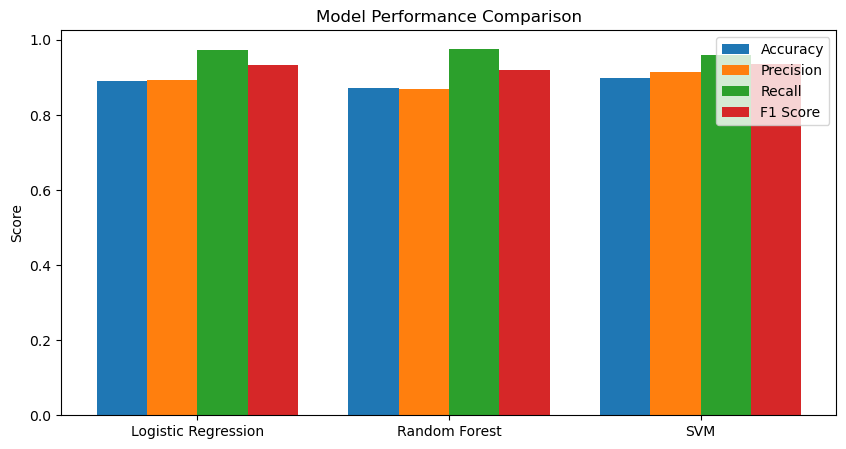

In [32]:
#Visualizing Model Performance
# Extracting scores
model_names = list(model_scores.keys())
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
scores = np.array(list(model_scores.values()))

# Plotting the metrics
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.2
x = np.arange(len(model_names))

for i in range(len(metrics)):
    ax.bar(x + i * bar_width, scores[:, i], width=bar_width, label=metrics[i])

ax.set_xticks(x + bar_width * 1.5)
ax.set_xticklabels(model_names)
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.legend()

plt.show()

# Task 5: Inferencing (Optional)
AI inference applies a trained model to predict outcomes on new, unseen data. How can you use your pre-trained model to classify sentiment on new and unseen text from your end, and evaluate its performance?

Note that:
- this task is more about the application of the model rather than the training process itself, where the model(s) created in the previous task should be utlised here on unseen data.
- unseen data: data that the model has not seen during training. This can include any new content you create independently.